<a href="https://colab.research.google.com/github/krishnachovatiya/project/blob/main/movie(new).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

upload = '/content/drive/MyDrive/Colab Notebooks/movies.csv'
import pandas as pd
import numpy as np
df = pd.read_csv(upload)
df.head()

Mounted at /content/drive


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


**DATA** **CLEANING**

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

df_cleaned = df.dropna(subset=['homepage'])

df_cleaned = df_cleaned.drop_duplicates()

mean_runtime = df_cleaned['runtime'].mean()
df_cleaned['runtime'].fillna(mean_runtime, inplace=True)

df_cleaned['tagline'].fillna("No Tagline", inplace=True)

print("Missing values in 'tagline' column after filling:")
print(df_cleaned['tagline'].isnull().sum())

cleaned_file_path = '/content/drive/MyDrive/Colab Notebooks/cleaned_movies.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)
print("Cleaned dataset saved to:", cleaned_file_path)

numeric_cols = df_cleaned.select_dtypes(include=np.number)



Missing Values:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64
Missing values in 'tagline' column after filling:
0
Cleaned dataset saved to: /content/drive/MyDrive/Colab Notebooks/cleaned_movies.csv


**Descriptive Statistics**

In [ ]:

mean_values = numeric_cols.mean()
median_values = numeric_cols.median()
mode_values = numeric_cols.mode().iloc[0]
print("\nMean Values:")
print(mean_values)
print("\nMedian Values:")
print(median_values)
print("\nMode Values:")
print(mode_values)

std_deviation = numeric_cols.std()
variance = numeric_cols.var()
print("\nStandard Deviation:")
print(std_deviation)
print("\nVariance:")
print(variance)

skewness = numeric_cols.skew()
kurtosis = numeric_cols.kurt()
print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)


Mean Values:
budget          4.196824e+07
id              6.729087e+04
popularity      3.261863e+01
revenue         1.395772e+08
runtime         1.081840e+02
vote_average    6.244685e+00
vote_count      1.194383e+03
dtype: float64

Median Values:
budget          2.200000e+07
id              2.757850e+04
popularity      2.181338e+01
revenue         4.978986e+07
runtime         1.050000e+02
vote_average    6.300000e+00
vote_count      5.245000e+02
dtype: float64

Mode Values:
budget            0.000000
id               11.000000
popularity        0.010909
revenue           0.000000
runtime         100.000000
vote_average      6.500000
vote_count        0.000000
Name: 0, dtype: float64

Standard Deviation:
budget          5.260389e+07
id              9.157867e+04
popularity      4.612060e+01
revenue         2.315356e+08
runtime         1.978137e+01
vote_average    1.067383e+00
vote_count      1.729009e+03
dtype: float64

Variance:
budget          2.767169e+15
id              8.386652e+09

**GRAPH PLOTTING**

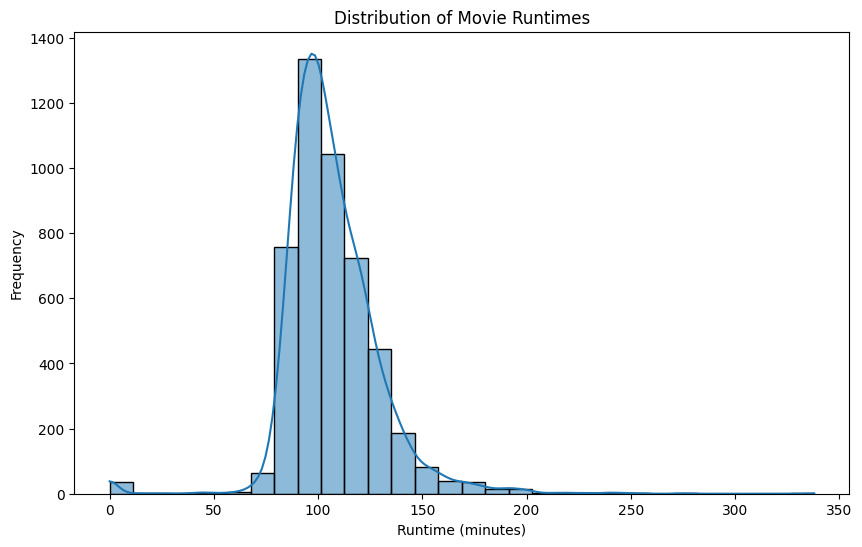

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='runtime', bins=30, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

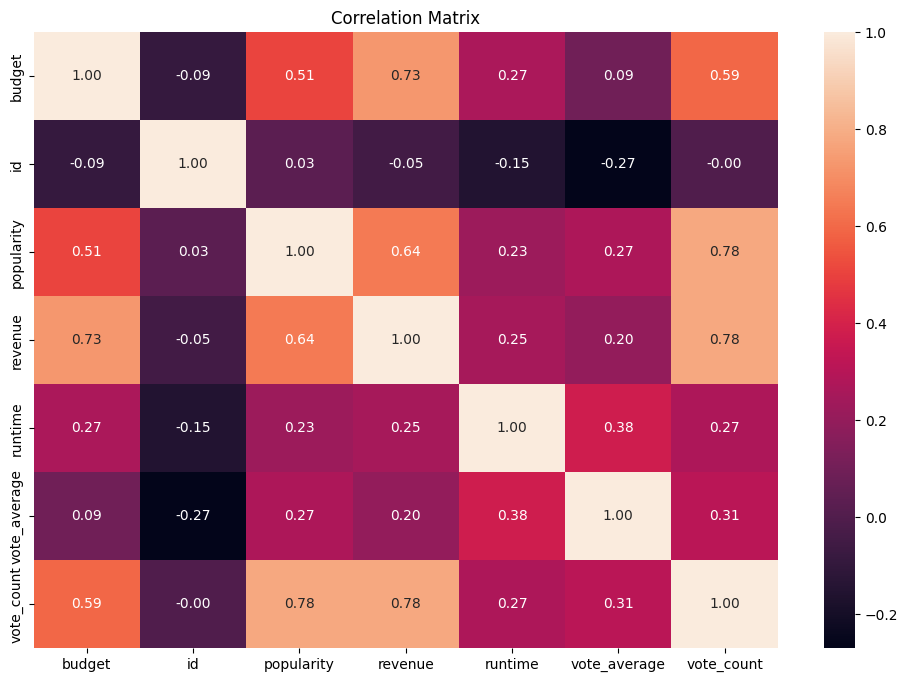

In [ ]:
df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


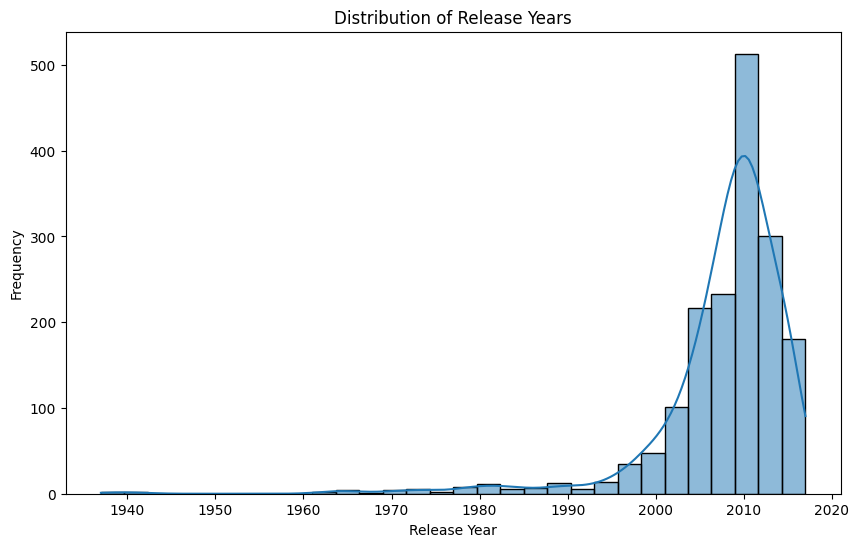

In [ ]:
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'])
df_cleaned['release_year'] = df_cleaned['release_date'].dt.year
df_cleaned['release_month'] = df_cleaned['release_date'].dt.month
df_cleaned['release_season'] = df_cleaned['release_date'].dt.quarter
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

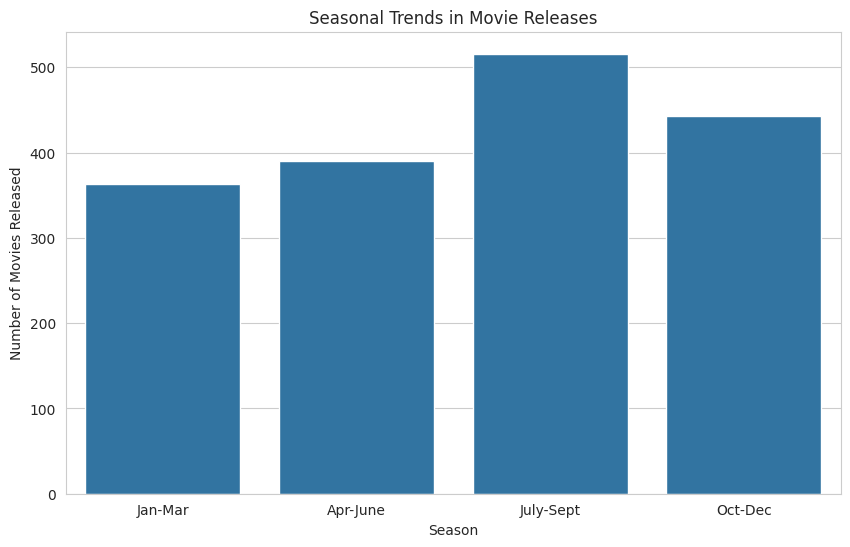

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='release_season')
plt.title('Seasonal Trends in Movie Releases')
plt.xlabel('Season')
plt.ylabel('Number of Movies Released')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Jan-Mar', 'Apr-June', 'July-Sept', 'Oct-Dec'])
plt.show()

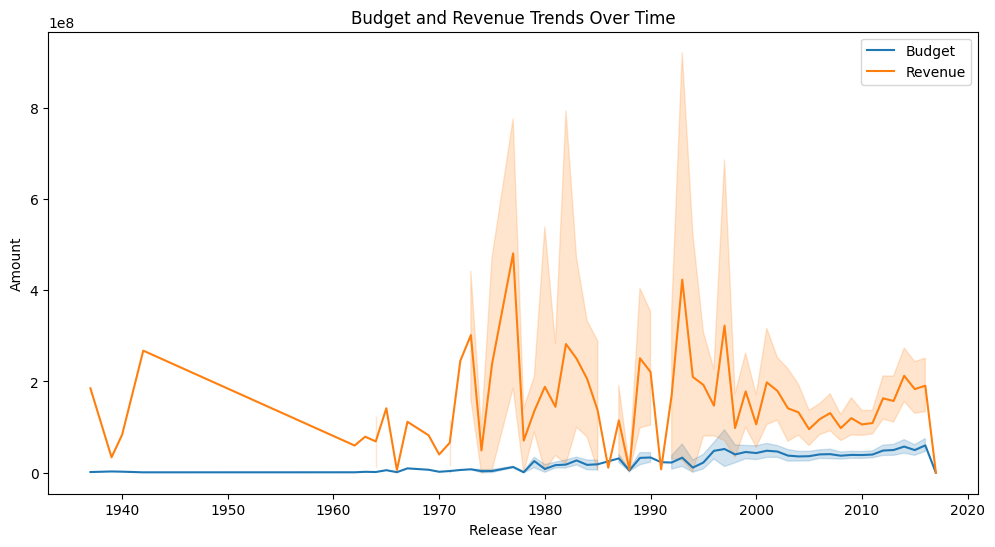

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='release_year', y='budget', label='Budget')
sns.lineplot(data=df_cleaned, x='release_year', y='revenue', label='Revenue')
plt.title('Budget and Revenue Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Amount')
plt.legend()
plt.show()

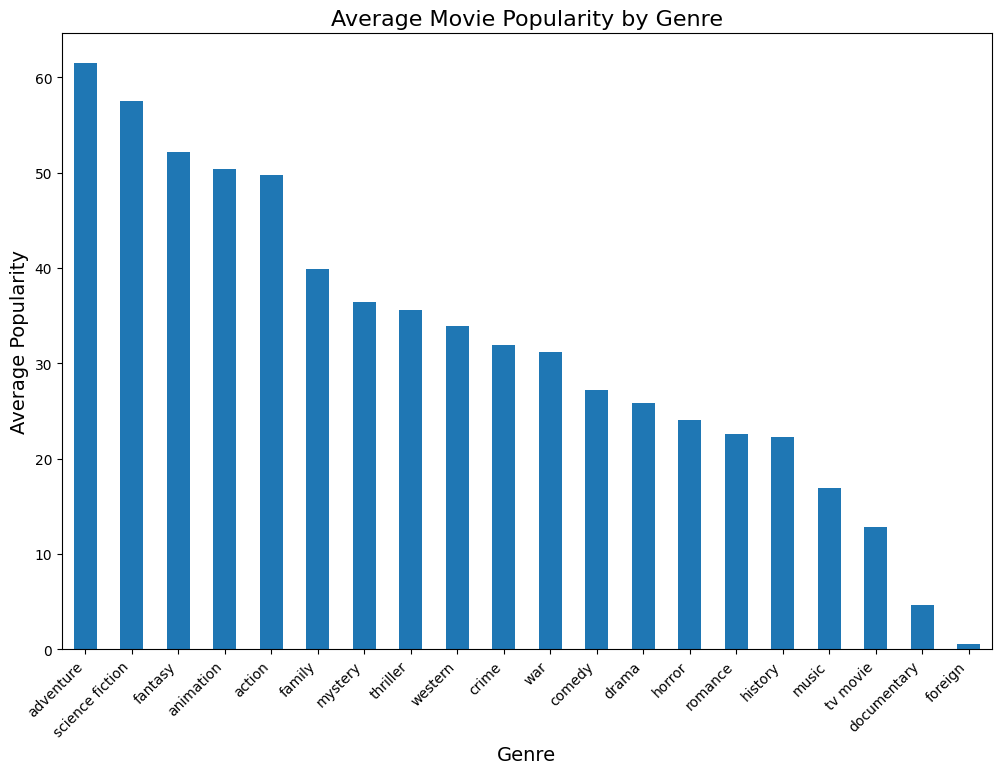

In [ ]:
import matplotlib.pyplot as plt

# Explode the 'genre_keywords' column to separate rows
df_exploded = df_cleaned.explode('genre_keywords')

# Merge the 'genre_keywords' and 'popularity' columns
genre_popularity = df_exploded[['genre_keywords', 'popularity']].dropna()

# Plot the genre keywords against popularity
fig, ax = plt.subplots(figsize=(12, 8))
ax = genre_popularity.groupby('genre_keywords')['popularity'].mean().sort_values(ascending=False).plot(kind='bar')
ax.set_title('Average Movie Popularity by Genre', fontsize=16)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Average Popularity', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

genre_revenue = df_exploded.groupby('genre_keywords')['revenue'].sum()

genre_revenue = genre_revenue.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette='viridis')
plt.title('Total Revenue by Genre')
plt.xlabel('Total Revenue')
plt.ylabel('Genre')
plt.show()


NameError: name 'df_exploded' is not defined


**Hypothesis Testing**

In [ ]:
import pandas as pd
from scipy import stats

cleaned_file_path = '/content/drive/MyDrive/Colab Notebooks/cleaned_movies.csv'
df_cleaned = pd.read_csv(cleaned_file_path)

english_revenue = df_cleaned[df_cleaned['original_language'] == 'en']['revenue']
non_english_revenue = df_cleaned[df_cleaned['original_language'] != 'en']['revenue']
t_stat_revenue, p_value_revenue = stats.ttest_ind(english_revenue, non_english_revenue)
print(" Results:")
print("T-statistic:", t_stat_revenue)
print("P-value:", p_value_revenue)


 Results:
T-statistic: 5.182519960383563
P-value: 2.4486441604307646e-07


**MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df_cleaned[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']]
y = df_cleaned['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.4929154426679116e+16


In [ ]:
X = df_cleaned[['budget', 'popularity', 'runtime', 'vote_average']]
y = df_cleaned['revenue']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1.6011319044342458e+16
R^2 Score: 0.6878420844829032
